# Image Classification with CNN for Malaria Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we will clasification on malaria data

In [ ]:
#libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
#load the data

In [ ]:
# cell images path
base_dir = os.getcwd()
infected_dir = os.path.join(base_dir, "cell_images", "Parasitized")
uninfected_dir = os.path.join(base_dir, "cell_images", "Uninfected")

# check infered path files
infected_files = os.listdir(infected_dir)
print("Infected Files:", infected_files)

# check uninfered path files
uninfected_files = os.listdir(uninfected_dir)
print("Uninfected Files:", uninfected_files)

# read infected pictures
infected_images = [cv2.cvtColor(cv2.imread(os.path.join(infected_dir, img)), cv2.COLOR_BGR2RGB) for img in infected_files if img.endswith(('.png', '.jpg', '.jpeg'))]

# read uninfected pictures
uninfected_images = [cv2.cvtColor(cv2.imread(os.path.join(uninfected_dir, img)), cv2.COLOR_BGR2RGB) for img in uninfected_files if img.endswith(('.png', '.jpg', '.jpeg'))]

# turn lsit to numpy list 
infected_images = np.array(infected_images)
uninfected_images = np.array(uninfected_images)



Infected Files: ['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png', 'C100P61ThinF_IMG_20150918_144348_cell_138.png', 'C100P61ThinF_IMG_20150918_144348_cell_139.png', 'C100P61ThinF_IMG_20150918_144348_cell_140.png', 'C100P61ThinF_IMG_20150918_144348_cell_141.png', 'C100P61ThinF_IMG_20150918_144348_cell_142.png', 'C100P61ThinF_IMG_20150918_144348_cell_143.png', 'C100P61ThinF_IMG_20150918_144348_cell_144.png', 'C100P61ThinF_IMG_20150918_144823_cell_157.png', 'C100P61ThinF_IMG_20150918_144823_cell_158.png', 'C100P61ThinF_IMG_20150918_144823_cell_159.png', 'C1

C:\Users\Selman\AppData\Local\Temp\ipykernel_2944\1501691095.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  infected_images = np.array(infected_images)
C:\Users\Selman\AppData\Local\Temp\ipykernel_2944\1501691095.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  uninfected_images = np.array(uninfected_images)


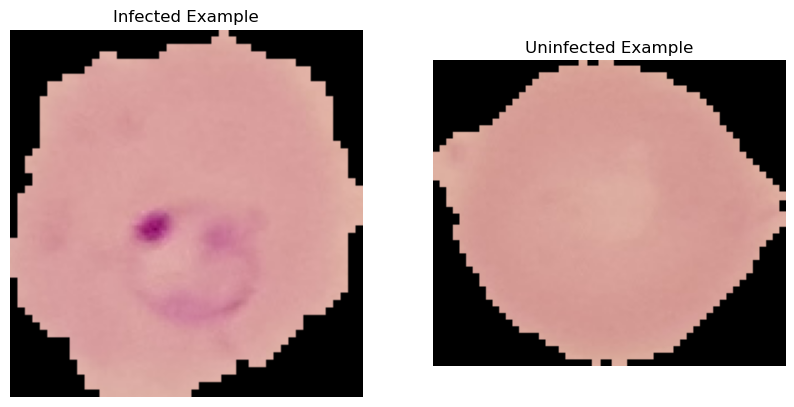

In [ ]:

# a sample picture of both class
infected_example = infected_images[0]
uninfected_example = uninfected_images[0]

# show pictures
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(infected_example)
plt.title('Infected Example')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(uninfected_example)
plt.title('Uninfected Example')
plt.axis('off')

plt.show()


In [ ]:
# path of iamges
base_dir = os.getcwd()
infected_dir = os.path.join(base_dir, "cell_images", "Parasitized")
uninfected_dir = os.path.join(base_dir, "cell_images", "Uninfected")

In [ ]:
# size of pictures
img_size = (128, 128)

In [ ]:
# resize infected pictures
infected_images = [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(infected_dir, img)), cv2.COLOR_BGR2RGB), img_size) for img in infected_files if img.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
# resize uninfected pictures
uninfected_images = [cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(uninfected_dir, img)), cv2.COLOR_BGR2RGB), img_size) for img in uninfected_files if img.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
# turn pictures to numpy list 
infected_images = np.array(infected_images)
uninfected_images = np.array(uninfected_images)

In [ ]:
# prepare tickets
infected_labels = np.ones(len(infected_images))
uninfected_labels = np.zeros(len(uninfected_images))

In [ ]:
# concat all data
X = np.concatenate((infected_images, uninfected_images), axis=0)
y = np.concatenate((infected_labels, uninfected_labels), axis=0)

In [ ]:
# data split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# normalization
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [ ]:
#chek data
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (22046, 128, 128, 3)
X_valid shape: (5512, 128, 128, 3)
y_train shape: (22046,)
y_valid shape: (5512,)


In [ ]:
# mdoeling
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model compailing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# mdoel summary
model.summary()


In [ ]:
#model fiting

In [ ]:
model.fit(X_train,y_train, validation_split=0.10, epochs=10)

In [ ]:
#model evualte

In [ ]:
loss,accuracy=model.evaluate(test_images,test_labels)

In [ ]:
#accuracy score

In [ ]:
accuracy

In [ ]:
#loss function

In [ ]:
loss

In [ ]:
#save model

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.joblib')

In [1]:
#sources

Zafer Acar Notes , ["https://chat.openai.com/"]